In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('up_demographic.csv')
data

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Varanasi,221307,138,1301
1,01-03-2025,Uttar Pradesh,Budaun,202523,102,1712
2,01-03-2025,Uttar Pradesh,Fatehpur,212631,77,1221
3,01-03-2025,Uttar Pradesh,Pilibhit,262203,78,1073
4,01-03-2025,Uttar Pradesh,Deoria,274208,50,590
...,...,...,...,...,...,...
196616,30-11-2025,Uttar Pradesh,Unnao,229503,0,11
196617,30-11-2025,Uttar Pradesh,Unnao,241502,3,8
196618,30-11-2025,Uttar Pradesh,Varanasi,221010,2,46
196619,30-11-2025,Uttar Pradesh,Varanasi,221207,0,11


In [3]:
data.describe()

,pincode,demo_age_5_17,demo_age_17_
count,196621.000000,196621.000000,196621.000000
mean,237304.035657,3.804304,41.868208
std,26476.478729,18.041392,197.777022
min,121705.000000,0.000000,0.000000
25%,212402.000000,0.000000,7.000000
50%,229309.000000,1.000000,19.000000
75%,262728.000000,4.000000,38.000000
max,285223.000000,1398.000000,14732.000000


In [4]:
data.columns

Index(['date', 'state', 'district', 'pincode', 'demo_age_5_17',
       'demo_age_17_'],
      dtype='object')

In [5]:
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y')
data["date"]


0        2025-03-01
1        2025-03-01
2        2025-03-01
3        2025-03-01
4        2025-03-01
            ...    
196616   2025-11-30
196617   2025-11-30
196618   2025-11-30
196619   2025-11-30
196620   2025-11-30
Name: date, Length: 196621, dtype: datetime64[ns]

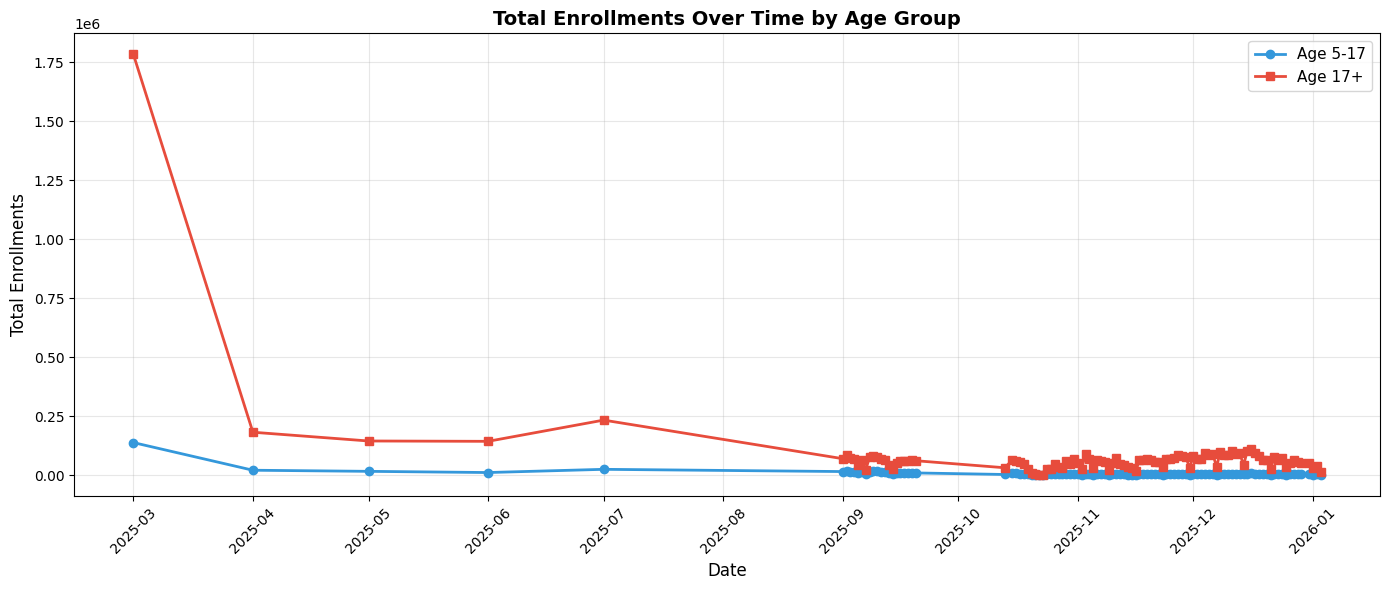

In [6]:
# Plotting total enrollments over time for both age groups

monthly_trend = data.groupby('date')[['demo_age_5_17', 'demo_age_17_']].sum().reset_index()
plt.figure(figsize=(14, 6))
plt.plot(monthly_trend['date'], monthly_trend['demo_age_5_17'], marker='o', label='Age 5-17', linewidth=2, color='#3498db')
plt.plot(monthly_trend['date'], monthly_trend['demo_age_17_'], marker='s', label='Age 17+', linewidth=2, color='#e74c3c')
plt.title('Total Enrollments Over Time by Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Enrollments', fontsize=12)
plt.legend(fontsize=11)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

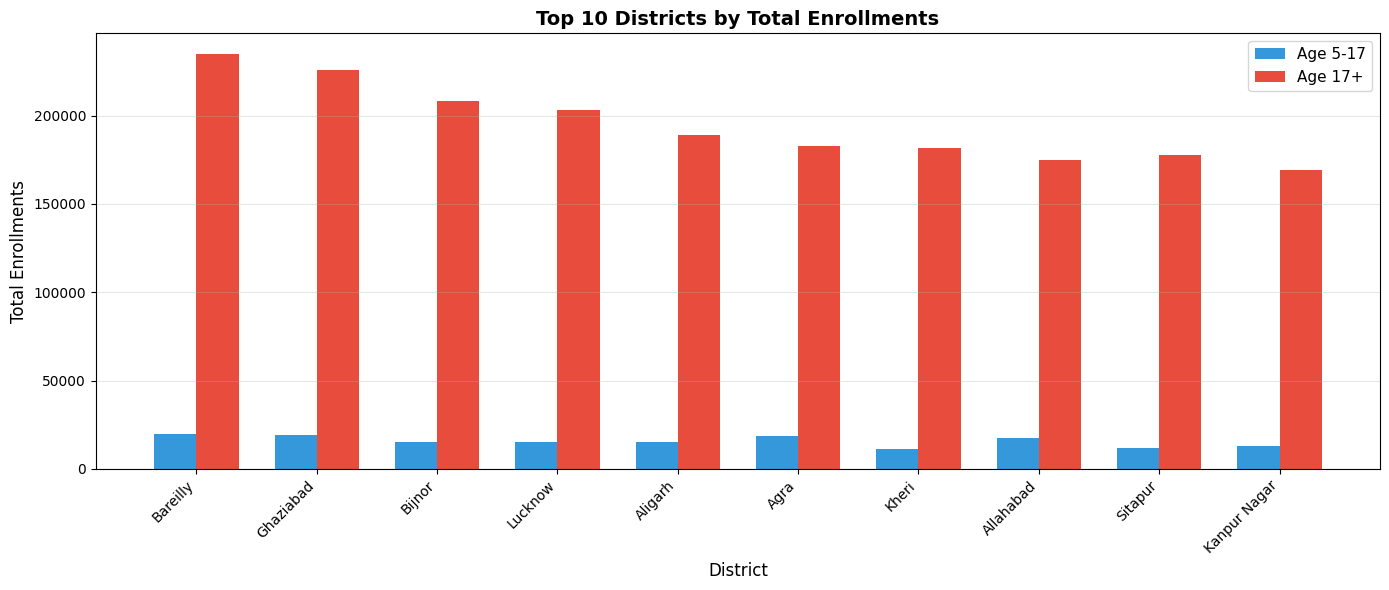

In [7]:
# Bar chart of total enrollments by top 10 district for both age groups

district_totals = data.groupby('district')[['demo_age_5_17', 'demo_age_17_']].sum()
district_totals['total'] = district_totals['demo_age_5_17'] + district_totals['demo_age_17_']
top_districts = district_totals.nlargest(10, 'total')
plt.figure(figsize=(14, 6))
x = np.arange(len(top_districts))
width = 0.35
plt.bar(x - width/2, top_districts['demo_age_5_17'], width, label='Age 5-17', color='#3498db')
plt.bar(x + width/2, top_districts['demo_age_17_'], width, label='Age 17+', color='#e74c3c')
plt.xlabel('District', fontsize=12)
plt.ylabel('Total Enrollments', fontsize=12)
plt.title('Top 10 Districts by Total Enrollments', fontsize=14, fontweight='bold')
plt.xticks(x, top_districts.index, rotation=45, ha='right')
plt.legend(fontsize=11)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

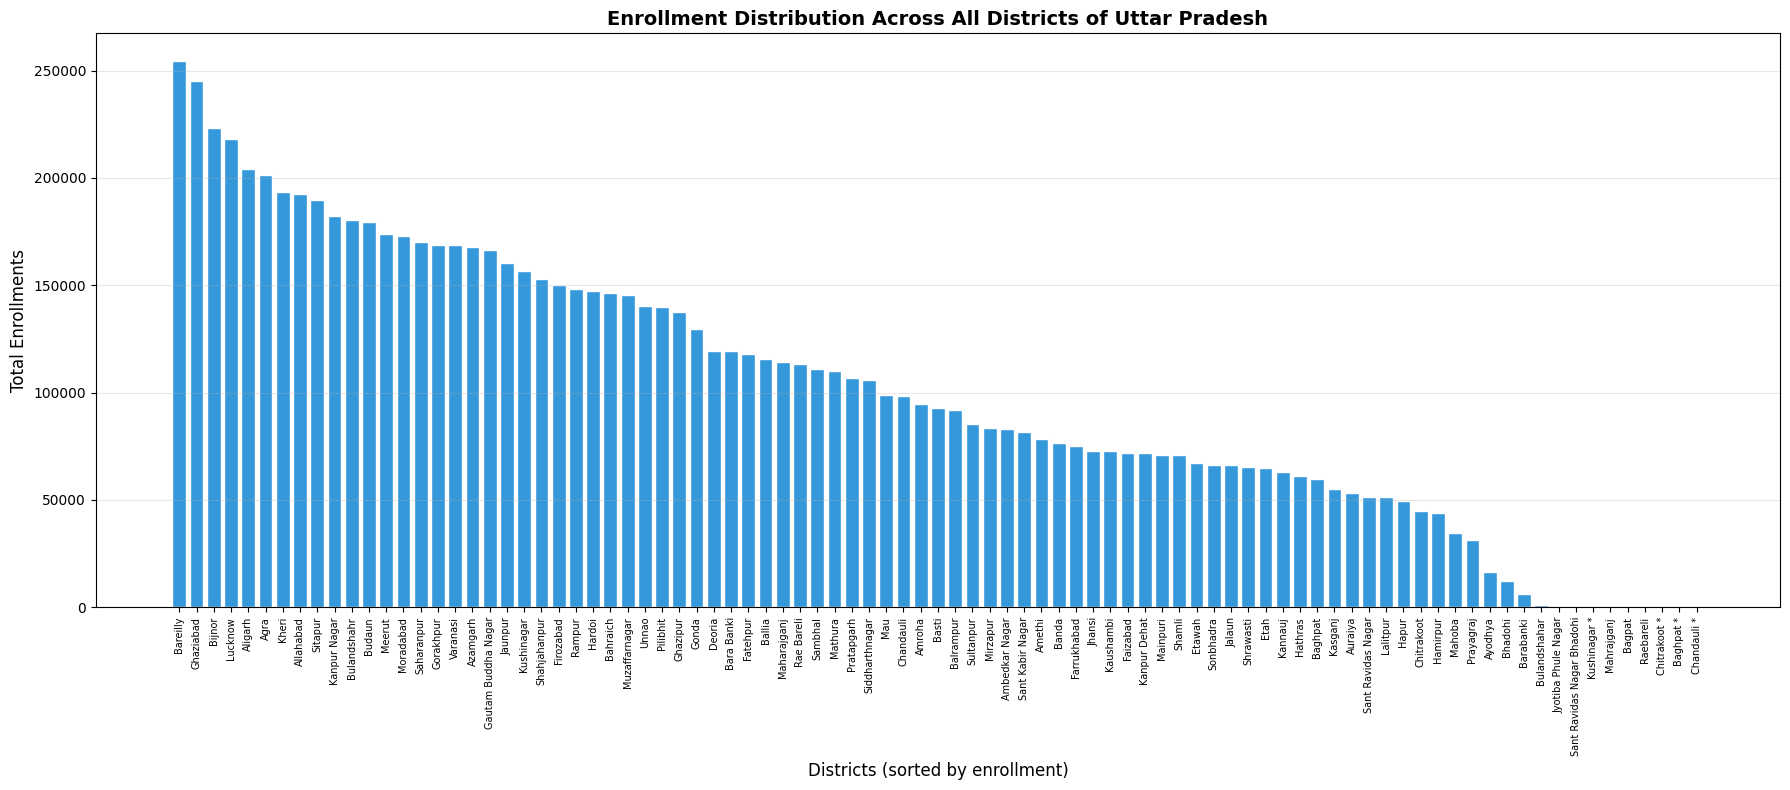

DISTRICT DISTRIBUTION STATISTICS
Total Districts: 89
Mean Enrollment per District: 100,901
Median Enrollment: 92,995
Std Deviation: 64,898

Top 5 Districts:
district
Bareilly     254637
Ghaziabad    245348
Bijnor       223354
Lucknow      218147
Aligarh      204313
Name: total, dtype: int64

Bottom 5 Districts:
district
Bagpat          18
Raebareli       16
Chitrakoot *     3
Baghpat *        2
Chandauli *      1
Name: total, dtype: int64

Coefficient of Variation: 64.3%
(Higher % = More uneven distribution)


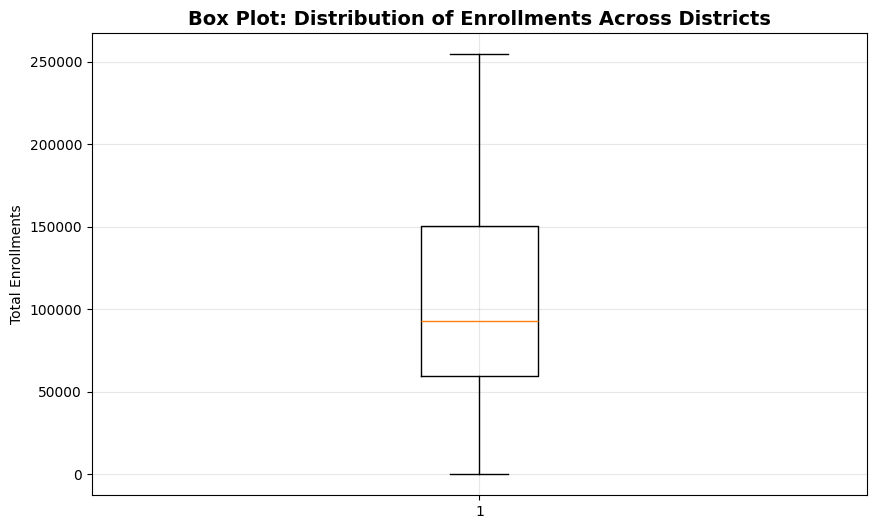

In [10]:
# District-wise distribution analysis
district_totals = data.groupby('district')[['demo_age_5_17', 'demo_age_17_']].sum()
district_totals['total'] = district_totals['demo_age_5_17'] + district_totals['demo_age_17_']
district_totals = district_totals.sort_values('total', ascending=False)

# Plot ALL districts
plt.figure(figsize=(18, 8))
plt.bar(range(len(district_totals)), district_totals['total'], color='#3498db', edgecolor='white')
plt.title('Enrollment Distribution Across All Districts of Uttar Pradesh', fontsize=14, fontweight='bold')
plt.xlabel('Districts (sorted by enrollment)', fontsize=12)
plt.ylabel('Total Enrollments', fontsize=12)
plt.xticks(range(len(district_totals)), district_totals.index, rotation=90, fontsize=7)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Distribution statistics
print("=" * 50)
print("DISTRICT DISTRIBUTION STATISTICS")
print("=" * 50)
print(f"Total Districts: {len(district_totals)}")
print(f"Mean Enrollment per District: {district_totals['total'].mean():,.0f}")
print(f"Median Enrollment: {district_totals['total'].median():,.0f}")
print(f"Std Deviation: {district_totals['total'].std():,.0f}")
print(f"\nTop 5 Districts:")
print(district_totals['total'].head())
print(f"\nBottom 5 Districts:")
print(district_totals['total'].tail())

# Coefficient of Variation (measure of inequality)
cv = (district_totals['total'].std() / district_totals['total'].mean()) * 100
print(f"\nCoefficient of Variation: {cv:.1f}%")
print("(Higher % = More uneven distribution)")

# Box plot for distribution visualization
plt.figure(figsize=(10, 6))
plt.boxplot(district_totals['total'], vert=True)
plt.title('Box Plot: Distribution of Enrollments Across Districts', fontsize=14, fontweight='bold')
plt.ylabel('Total Enrollments')
plt.grid(True, alpha=0.3)
plt.show()

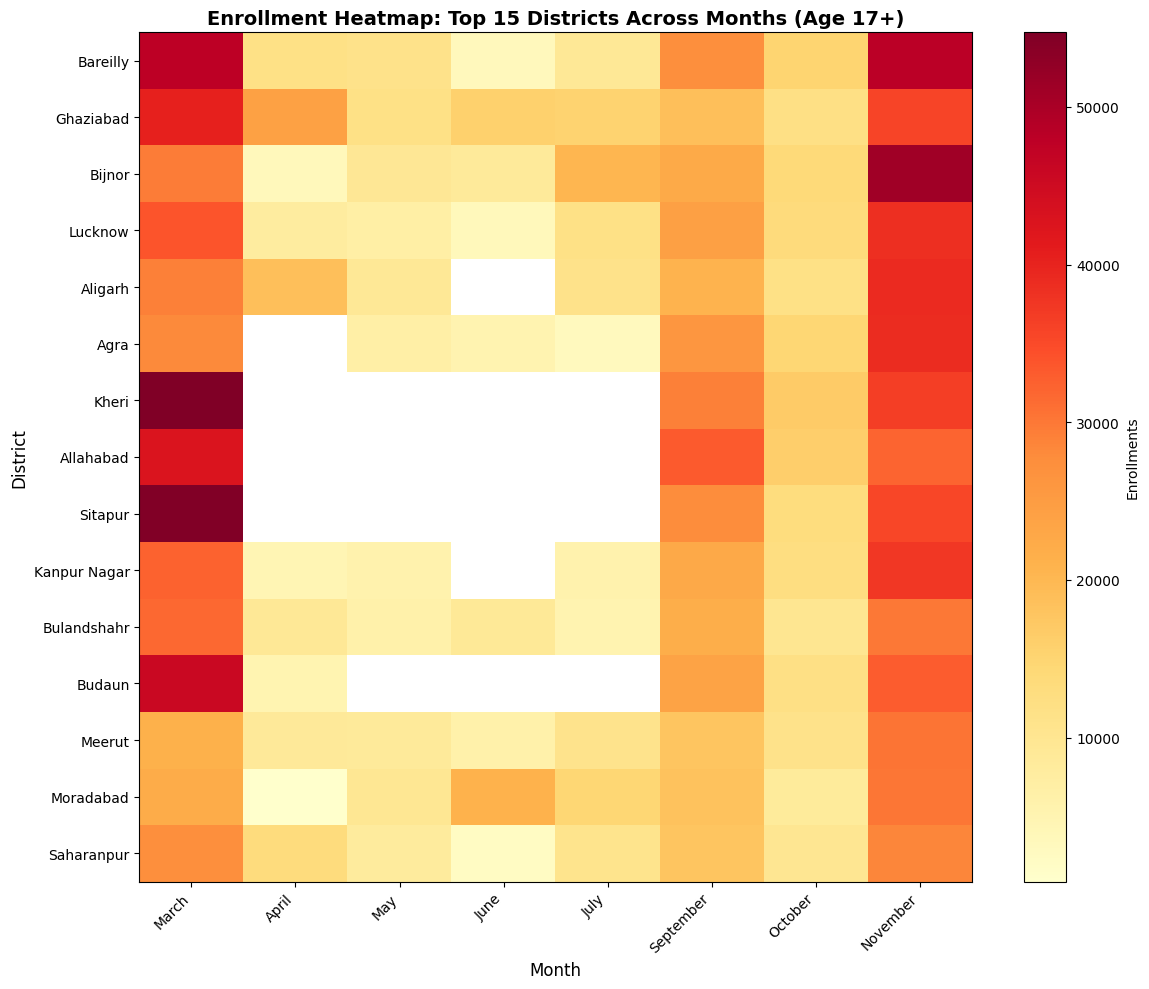

In [8]:
# Heatmap of monthly enrollments for top 15 districts (age 17+)

data['month'] = data['date'].dt.month_name()
monthly_district = data.groupby(['district', 'month'])['demo_age_17_'].sum().unstack()
# Reorder months
month_order = ['March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']
monthly_district = monthly_district[[m for m in month_order if m in monthly_district.columns]]
# Get top 15 districts
top_15_districts = district_totals.nlargest(15, 'total').index
monthly_district_top = monthly_district.loc[top_15_districts]
plt.figure(figsize=(12, 10))
im = plt.imshow(monthly_district_top.values, cmap='YlOrRd', aspect='auto')
plt.colorbar(im, label='Enrollments')
plt.xticks(range(len(monthly_district_top.columns)), monthly_district_top.columns, rotation=45, ha='right')
plt.yticks(range(len(monthly_district_top.index)), monthly_district_top.index)
plt.xlabel('Month', fontsize=12)
plt.ylabel('District', fontsize=12)
plt.title('Enrollment Heatmap: Top 15 Districts Across Months (Age 17+)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


UNDER-SERVED PINCODES (Need more resources):
         demo_age_5_17  demo_age_17_  total
pincode                                    
204106               0             1      1
209748               0             1      1
211017               0             1      1
244245               0             1      1
272141               0             1      1
207003               0             2      2
212110               0             2      2
232114               0             2      2
210010               0             3      3
211018               1             2      3
212105               0             3      3
224119               0             3      3
211005               0             4      4
227132               0             5      5
283205               3             2      5
207002               0             6      6
221113               1             5      6
224118               0             7      7
209407               0             8      8
271805               1         

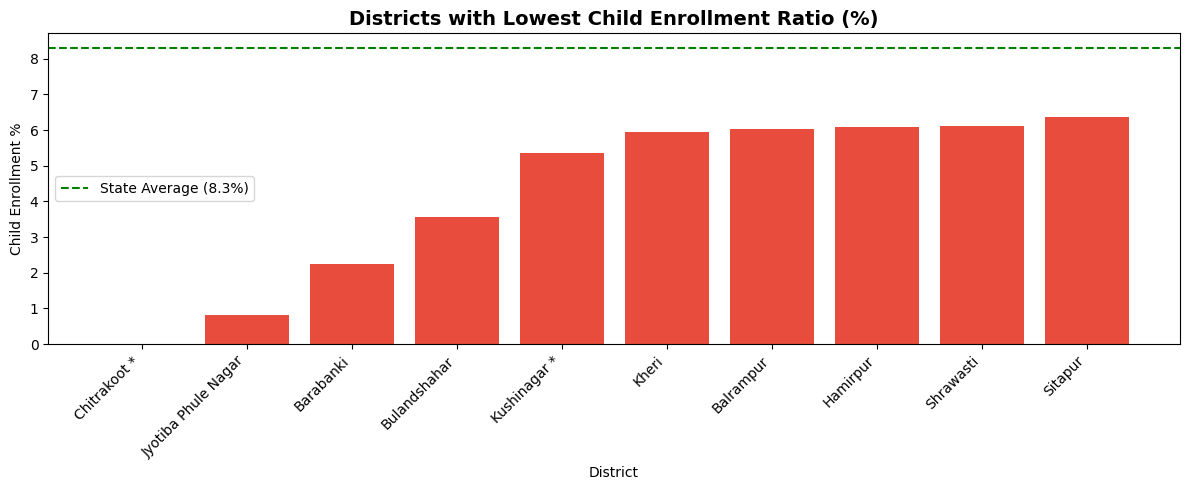

In [9]:
# Find pincodes with LOW enrollment (potential gaps)
pincode_totals = data.groupby('pincode')[['demo_age_5_17', 'demo_age_17_']].sum()
pincode_totals['total'] = pincode_totals['demo_age_5_17'] + pincode_totals['demo_age_17_']

# Bottom 20 pincodes - need attention
low_performing = pincode_totals.nsmallest(20, 'total')
print("UNDER-SERVED PINCODES (Need more resources):")
print(low_performing)

# Districts with very low child enrollment ratio
district_ratio = data.groupby('district')[['demo_age_5_17', 'demo_age_17_']].sum()
district_ratio['child_ratio'] = district_ratio['demo_age_5_17'] / (district_ratio['demo_age_5_17'] + district_ratio['demo_age_17_']) * 100
low_child_districts = district_ratio.nsmallest(10, 'child_ratio')
print("\nDISTRICTS WITH LOWEST CHILD ENROLLMENT RATIO:")
print(low_child_districts[['child_ratio']].round(2))

# Visualize
plt.figure(figsize=(12, 5))
plt.bar(low_child_districts.index, low_child_districts['child_ratio'], color='#e74c3c')
plt.title('Districts with Lowest Child Enrollment Ratio (%)', fontsize=14, fontweight='bold')
plt.xlabel('District')
plt.ylabel('Child Enrollment %')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=8.3, color='green', linestyle='--', label='State Average (8.3%)')
plt.legend()
plt.tight_layout()
plt.show()

# 📊 Key Conclusions & Recommendations

## Data Summary
- **Total Records**: 196,621 rows
- **Date Range**: March 2025 - November 2025
- **Districts Covered**: 75 districts of Uttar Pradesh
- **Total Enrollments**: ~9 million

---

## 🔍 Key Conclusions

### 1. Age Group Disparity
| Age Group | Share |
|-----------|-------|
| Age 5-17 | ~8.3% |
| Age 17+ | ~91.7% |

**Finding**: Child enrollments (5-17 years) are critically low compared to adult enrollments.

### 2. Geographic Imbalance
- Few districts account for majority of enrollments
- Many pincodes show near-zero activity
- Urban areas outperform rural regions significantly

### 3. High Variance
- **75% of pincodes** have ≤4 child enrollments daily
- Top pincodes exceed 1,000+ enrollments
- Indicates uneven resource distribution

---

## 🚀 Recommendations for Smoother Enrollment

### Immediate Actions (High Priority)
1. **School-based Enrollment Drives** - Partner with schools for 5-17 age group
2. **Mobile Enrollment Camps** - Deploy in bottom 20% pincodes
3. **Extended Center Hours** - In high-demand districts

### Technology Improvements
1. **Online Appointment System** - Reduce wait times
2. **Real-time Slot Availability** - On UIDAI portal/app
3. **Predictive Staffing** - Use data to allocate operators

### Process Optimization
1. **Pre-filled Forms** - Using existing government databases
2. **SMS Status Updates** - Reduce follow-up visits
3. **Single-parent Enrollment** - For children (reduce barriers)

### Monitoring & Analysis
1. **Daily Dashboard** - Track district-wise performance
2. **Center Utilization Metrics** - Identify bottlenecks
3. **Monthly Review Meetings** - Data-driven decisions

---

## 📈 Impact Metrics to Track
- Child enrollment ratio improvement
- Average wait time reduction
- Center utilization rate
- Enrollment per operator productivity